## Libraries

In [1]:
# importing necessary libraries
import pandas as pd  # data analysis
import numpy as np  # mathematic evaluations
#from sklearn.preprocessing import MinMaxScaler # for data scaling
#from sklearn.preprocessing import RobustScaler # for data scaling
from sklearn.preprocessing import StandardScaler # for data scaling
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.utils.class_weight import compute_sample_weight # for changing weight of the columns
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # data visualization

## Imports

In [2]:
df_merged = pd.read_csv('C:/Users/lluis/Desktop/Documents/IronHack/Final_Project/data/cleaned/df_merged.csv')
df_exchange_rate = pd.read_csv('C:/Users/lluis/Desktop/Documents/IronHack/Final_Project/data/cleaned/df_exchange_rate.csv')

### Transforming Data for ML

In [3]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 59 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_name      175 non-null    object 
 1   un_class_2014     150 non-null    object 
 2   imf_class_2023    172 non-null    object 
 3   g7                175 non-null    bool   
 4   eu_member         175 non-null    bool   
 5   fuel_exp_country  175 non-null    bool   
 6   wealth_rank       161 non-null    float64
 7   ISO2              174 non-null    object 
 8   ISO3              175 non-null    object 
 9   1980              126 non-null    float64
 10  1981              127 non-null    float64
 11  1982              127 non-null    float64
 12  1983              127 non-null    float64
 13  1984              127 non-null    float64
 14  1985              128 non-null    float64
 15  1986              129 non-null    float64
 16  1987              129 non-null    float64
 1

In [4]:
# First I am dropping the columns I will not use

df_merged_pred = df_merged.drop(['un_class_2014', 'g7', 'eu_member', 'fuel_exp_country', 'wealth_rank', 'imf_class_2023', 'ISO2', 'ISO3', '2025', '2026', '2027', '2028','2029'], axis=1)

### Dealing with null values

In [5]:
# We will estimate the NaN values based on other values in the same column (year)
df_merged_pred = df_merged_pred.interpolate(axis=0)

C:\Users\lluis\AppData\Local\Temp\ipykernel_16448\485477642.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_merged_pred = df_merged_pred.interpolate(axis=0)


### Data Scaling

Selecting the countries for which I want to predict GDP per capita with ARIMA

In [6]:
# Create a new DataFrame with only rows where 'country_name' is 'Spain'
df_spain = df_merged_pred[df_merged_pred['country_name'] == 'Spain'].T
# Drop the first row
df_spain = df_spain.drop(df_spain.index[0])

# Create a new DataFrame with only rows where 'country_name' is 'Switzerland'
df_switzerland = df_merged_pred[df_merged_pred['country_name'] == 'Switzerland'].T
# Drop the first row
df_switzerland = df_switzerland.drop(df_switzerland.index[0])

# Create a new DataFrame with only rows where 'country_name' is 'United States'
df_usa = df_merged_pred[df_merged_pred['country_name'] == 'United States'].T
# Drop the first row
df_usa = df_usa.drop(df_usa.index[0])

# Create a new DataFrame with only rows where 'country_name' is 'India'
df_india = df_merged_pred[df_merged_pred['country_name'] == 'India'].T
# Drop the first row
df_india = df_india.drop(df_india.index[0])

# Create a new DataFrame with only rows where 'country_name' is 'Venezuela'
df_venezuela = df_merged_pred[df_merged_pred['country_name'] == 'Venezuela'].T
# Drop the first row
df_venezuela = df_venezuela.drop(df_venezuela.index[0])

In [7]:
# Create a StandardScaler instance for each of the countries
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()
scaler4 = StandardScaler()
scaler5 = StandardScaler()

# Fit the scaler to the data and transform the data
df_spain_scaled = pd.DataFrame(scaler1.fit_transform(df_spain), columns=df_spain.columns, index=df_spain.index)
df_switzerland_scaled = pd.DataFrame(scaler2.fit_transform(df_switzerland), columns=df_switzerland.columns, index=df_switzerland.index)
df_usa_scaled = pd.DataFrame(scaler3.fit_transform(df_usa), columns=df_usa.columns, index=df_usa.index)
df_india_scaled = pd.DataFrame(scaler4.fit_transform(df_india), columns=df_india.columns, index=df_india.index)
df_venezuela_scaled = pd.DataFrame(scaler5.fit_transform(df_venezuela), columns=df_venezuela.columns, index=df_venezuela.index)

### ARIMA Prediction

ARIMA prediction for Spain

In [8]:
# We want to predict the next 5 columns of df_spain
y = df_spain_scaled.iloc[:, -1]

# Define the auto_arima model
model = auto_arima(y, start_p=1, start_q=1, max_p=6, max_q=6, m=12,
                   start_P=0, seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True, stepwise=True)

# Fit the model
model_fit = model.fit(y)

# Print the best model parameters
print(model_fit.summary())

# Predict the next 5 values
next_values = model_fit.predict(n_periods=5)
print(f"The predicted next 5 values are {next_values}")

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-26.474, Time=28.40 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-27.690, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-28.411, Time=13.76 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-28.460, Time=55.17 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-28.280, Time=2.21 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-26.757, Time=46.05 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-26.757, Time=36.87 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-28.740, Time=12.33 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-26.757, Time=17.65 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-24.757, Time=38.51 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-28.539, Time=9.16 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-26.763, Time=52.04 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=-26.775, Time=28.59 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=-25.023, Time=76.43 sec
 ARIMA(0,1,1)(1,1,0)[1

In [9]:
# Define the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)

# Loop over the splits
for train_index, test_index in tscv.split(y):
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    model_fit = model.fit(y_train)

    # Make predictions on the test data
    y_pred = model_fit.predict(n_periods=len(y_test))

    # Calculate the metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")

C:\Users\lluis\AppData\Local\Temp\ipykernel_16448\873123723.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


MAE: 0.2501697625435116
MSE: 0.08214260209910619
RMSE: 0.2866053071719123
R2 Score: 0.4599458440052079


C:\Users\lluis\AppData\Local\Temp\ipykernel_16448\873123723.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


MAE: 0.2415005015967703
MSE: 0.11679653056011245
RMSE: 0.3417550739347003
R2 Score: 0.6146746418650428


Interpretation:

- MAE, MSE, and RMSE: These metrics appear to be in a reasonable range, but their adequacy depends on the context, including the scale of the data and the specific problem domain. In isolation, they don't tell you whether the model is good or bad; they need to be compared to the baseline errors (e.g., errors obtained from a simple model like mean prediction).

- R² Score: The negative R² score is concerning. It suggests that the model is not performing well and is worse than a trivial model that would predict the mean of the target variable for all observations. This indicates that there may be significant issues with the model, such as overfitting, underfitting, incorrect model assumptions, or issues with the data itself.

In [10]:
# Now to descale your predictions
next_values_descaled = scaler1.inverse_transform(next_values.values.reshape(-1, 1))

print(next_values_descaled)

[[53196.52168144]
 [54130.05591264]
 [55297.28060515]
 [57196.2362547 ]
 [59151.81642286]]


We add the predicted data back to spain_df

In [11]:
# We add our predictions to the dataframe
years = [2025, 2026, 2027, 2028, 2029]
for i, year in enumerate(years):
    df_spain.loc[year] = next_values_descaled[i]

ARIMA prediction for Switzerland

In [12]:
# We want to predict the next 5 columns of df_switzerland
y = df_switzerland_scaled.iloc[:, -1]

# Define the auto_arima model
model = auto_arima(y, start_p=1, start_q=1, max_p=6, max_q=6, m=12,
                   start_P=0, seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True, stepwise=True)

# Fit the model
model_fit = model.fit(y)

# Print the best model parameters
print(model_fit.summary())

# Predict the next 5 values
next_values = model_fit.predict(n_periods=5)
print(f"The predicted next 5 values are {next_values}")

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-51.219, Time=55.86 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-47.046, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-51.311, Time=14.87 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-52.861, Time=17.86 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-49.433, Time=2.64 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-51.422, Time=32.28 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-51.422, Time=63.49 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-52.960, Time=25.77 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-51.422, Time=75.12 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-49.422, Time=64.32 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-49.283, Time=16.44 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-51.178, Time=40.75 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=-51.155, Time=23.36 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=-48.963, Time=32.28 sec
 ARIMA(0,1,1)(1,1,0)[

In [13]:
# Define the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)

# Loop over the splits
for train_index, test_index in tscv.split(y):
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    model_fit = model.fit(y_train)

    # Make predictions on the test data
    y_pred = model_fit.predict(n_periods=len(y_test))

    # Calculate the metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")

C:\Users\lluis\AppData\Local\Temp\ipykernel_16448\873123723.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


MAE: 0.37673565858625946
MSE: 0.2379596589380115
RMSE: 0.4878110893963067
R2 Score: -0.9758791942434588


C:\Users\lluis\AppData\Local\Temp\ipykernel_16448\873123723.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


MAE: 0.4483598516353471
MSE: 0.3040156237346455
RMSE: 0.5513761182121016
R2 Score: -0.01659624713560448


In [14]:
# Now to descale your predictions
next_values_descaled = scaler2.inverse_transform(next_values.values.reshape(-1, 1))

print(next_values_descaled)

[[ 94795.83632304]
 [ 97224.0129576 ]
 [ 99202.29603772]
 [101929.28139771]
 [104751.79454437]]


In [15]:
# We add our predictions to the dataframe
years = [2025, 2026, 2027, 2028, 2029]
for i, year in enumerate(years):
    df_switzerland.loc[year] = next_values_descaled[i]

ARIMA prediction for USA

In [16]:
# We want to predict the next 5 columns of df_usa
y = df_usa_scaled.iloc[:, -1]

# Define the auto_arima model
model = auto_arima(y, start_p=1, start_q=1, max_p=6, max_q=6, m=12,
                   start_P=0, seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True, stepwise=True)

# Fit the model
model_fit = model.fit(y)

# Print the best model parameters
print(model_fit.summary())

# Predict the next 5 values
next_values = model_fit.predict(n_periods=5)
print(f"The predicted next 5 values are {next_values}")

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-55.830, Time=38.71 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-53.085, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-58.160, Time=18.87 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-56.424, Time=15.53 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-57.150, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-56.162, Time=27.65 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-56.162, Time=23.61 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-57.583, Time=19.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-54.162, Time=35.55 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-53.852, Time=13.26 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-56.299, Time=35.53 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-56.409, Time=52.41 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-56.996, Time=29.48 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=-54.976, Time=46.37 sec
 ARIMA(1,1,0)(1,1,0)[

In [17]:
# Define the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)

# Loop over the splits
for train_index, test_index in tscv.split(y):
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    model_fit = model.fit(y_train)

    # Make predictions on the test data
    y_pred = model_fit.predict(n_periods=len(y_test))

    # Calculate the metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")

C:\Users\lluis\AppData\Local\Temp\ipykernel_16448\873123723.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


MAE: 0.05666672531587677
MSE: 0.006739057822099983
RMSE: 0.08209176464238044
R2 Score: 0.9415816604141831


C:\Users\lluis\AppData\Local\Temp\ipykernel_16448\873123723.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


MAE: 0.7454628178851508
MSE: 0.8077991399144799
RMSE: 0.8987764682692132
R2 Score: -1.4151135188584858


In [18]:
# Now to descale your predictions
next_values_descaled = scaler3.inverse_transform(next_values.values.reshape(-1, 1))

print(next_values_descaled)

[[87808.5946478 ]
 [90172.4850082 ]
 [92666.44403122]
 [95200.11477901]
 [98297.37107237]]


In [19]:
# We add our predictions to the dataframe
years = [2025, 2026, 2027, 2028, 2029]
for i, year in enumerate(years):
    df_usa.loc[year] = next_values_descaled[i]

ARIMA prediction for India

In [20]:
# We want to predict the next 5 columns of df_india
y = df_india_scaled.iloc[:, -1]

# Define the auto_arima model
model = auto_arima(y, start_p=1, start_q=1, max_p=6, max_q=6, m=12,
                   start_P=0, seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True, stepwise=True)

# Fit the model
model_fit = model.fit(y)

# Print the best model parameters
print(model_fit.summary())

# Predict the next 5 values
next_values = model_fit.predict(n_periods=5)
print(f"The predicted next 5 values are {next_values}")

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-59.530, Time=42.58 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-52.221, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-61.355, Time=19.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-59.521, Time=12.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-61.339, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-59.555, Time=37.51 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-59.555, Time=62.59 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-61.490, Time=10.19 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=-59.555, Time=42.88 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=-57.555, Time=30.12 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-54.836, Time=11.16 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=-59.535, Time=43.05 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=-57.561, Time=42.53 sec
 ARIMA(1,1,0)(0,1,1)[12] intercept   : AIC=-62.886, Time=11.93 sec
 ARIMA(1,1,0)(0,1,0)[

In [21]:
# Define the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)

# Loop over the splits
for train_index, test_index in tscv.split(y):
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    model_fit = model.fit(y_train)

    # Make predictions on the test data
    y_pred = model_fit.predict(n_periods=len(y_test))

    # Calculate the metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")

C:\Users\lluis\AppData\Local\Temp\ipykernel_16448\873123723.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


MAE: 0.18637325224948045
MSE: 0.05951050450931248
RMSE: 0.2439477495475465
R2 Score: 0.2926508030744899
MAE: 0.21539397478296352
MSE: 0.09783202330601586
RMSE: 0.3127811108523273
R2 Score: 0.7854876396681987


C:\Users\lluis\AppData\Local\Temp\ipykernel_16448\873123723.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


In [22]:
# Now to descale your predictions
next_values_descaled = scaler4.inverse_transform(next_values.values.reshape(-1, 1))

print(next_values_descaled)

[[10558.16087407]
 [10910.37140777]
 [11293.92940325]
 [11809.83085343]
 [12290.49704411]]


In [23]:
# We add our predictions to the dataframe
years = [2025, 2026, 2027, 2028, 2029]
for i, year in enumerate(years):
    df_india.loc[year] = next_values_descaled[i]

ARIMA prediction for Venezuela

In [24]:
# We want to predict the next 5 columns of df_venezuela
y = df_venezuela_scaled.iloc[:, -1]

# Define the auto_arima model
model = auto_arima(y, start_p=1, start_q=1, max_p=6, max_q=6, m=12,
                   start_P=0, seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True, stepwise=True)

# Fit the model
model_fit = model.fit(y)

# Print the best model parameters
print(model_fit.summary())

# Predict the next 5 values
next_values = model_fit.predict(n_periods=5)
print(f"The predicted next 5 values are {next_values}")

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=48.78 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=50.322, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=32.762, Time=21.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=27.00 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=41.826, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=31.048, Time=35.63 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=33.040, Time=31.13 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=48.31 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=44.151, Time=24.49 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=32.362, Time=38.85 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=32.345, Time=46.37 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=33.566, Time=69.80 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=34.325, Time=92.80 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=32.074, Time=49.88 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]       

In [25]:
# Split the data into training and test sets
y_train, y_test = train_test_split(y, test_size=0.2, shuffle=False)

# Fit the model on the training data
model_fit = model.fit(y_train)

# Make predictions on the test data
y_pred = model_fit.predict(n_periods=len(y_test))

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 3.3609205076826125
MSE: 12.493998098606177
RMSE: 3.5346850069852302
R2 Score: -20.750781048137185


In [26]:
# Now to descale your predictions
next_values_descaled = scaler4.inverse_transform(next_values.values.reshape(-1, 1))

print(next_values_descaled)

[[ 598.94175368]
 [ 584.99073887]
 [ 948.99020504]
 [2566.0649292 ]
 [3524.49542004]]


In [27]:
# We add our predictions to the dataframe
years = [2025, 2026, 2027, 2028, 2029]
for i, year in enumerate(years):
    df_venezuela.loc[year] = next_values_descaled[i]

### Predictions Comparison

First we create a pivot table with the forecast of ECB for the next years

In [29]:
# List of years from 1993 to 2029
years = list(map(str, range(1993, 2030)))

# List of countries
countries = ['Spain', 'United States', 'India', 'Switzerland', 'Venezuela']

# Filter the DataFrame to include only the countries in the list
df_filtered = df_merged[df_merged['country_name'].isin(countries)]

# Set 'country_name' as the index and select only the columns for the years
pivot_table_ecb = df_filtered.set_index('country_name')[years]

# Display the pivot table
print(pivot_table_ecb)

                    1993       1994       1995       1996       1997  \
country_name                                                           
Switzerland    33172.325  34021.135  34681.015  35258.617  36572.274   
United States  26364.192  27674.021  28671.480  29946.973  31440.087   
Spain          16620.937  17325.517  18374.841  19120.069  20148.386   
India           1367.822   1460.249   1572.155   1688.531   1753.237   
Venezuela      11427.619  11146.894  11575.821  11516.704  12210.037   

                    1998       1999       2000       2001       2002  ...  \
country_name                                                          ...   
Switzerland    37988.682  39001.417  41292.689  42703.596  42992.588  ...   
United States  32833.666  34496.241  36312.782  37101.453  37945.761  ...   
Spain          21211.034  22416.165  23880.729  25246.885  25920.805  ...   
India           1847.385   2001.886   2087.485   2197.354   2275.590  ...   
Venezuela      12140.770  11350.4

Plotting ECB Predictions

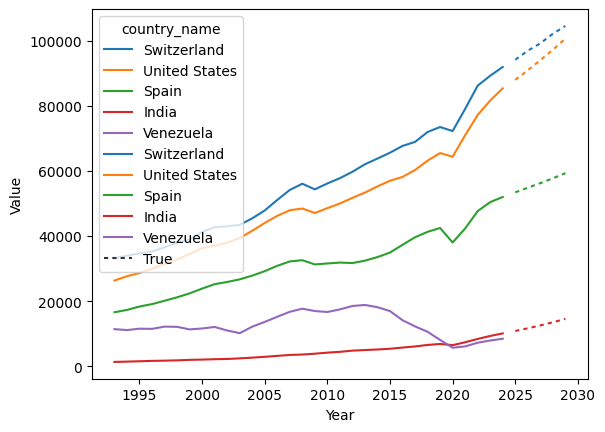

In [98]:
# Melt the DataFrame
df_melted = pd.melt(pivot_table_ecb.reset_index(), id_vars='country_name', var_name='Year', value_name='Value')

# Convert 'Year' to numeric
df_melted['Year'] = pd.to_numeric(df_melted['Year'])

# Create a line plot for the years before 2025
sns.lineplot(data=df_melted[df_melted['Year'] < 2025], x='Year', y='Value', hue='country_name')

# Create a line plot for the years from 2025 onwards with a different line style
sns.lineplot(data=df_melted[df_melted['Year'] >= 2025], x='Year', y='Value', hue='country_name', style=True, dashes=[(2,2)])

plt.show()

We create a pivot table with our predictions in the same format

In [58]:
# Transpose df_usa
df_spain_p = df_spain.T

# List of columns to drop
columns_to_drop = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992']

# Drop the columns
df_spain_p = df_spain_p.drop(columns=columns_to_drop)

# Add a column named 'country_name' at the beginning and set its value to 'United States'
df_spain_p.insert(0, 'country_name', 'Spain')

# Set 'country_name' as the index
df_spain_p = df_spain_p.set_index('country_name')

In [61]:
# Transpose df_usa
df_usa_p = df_usa.T

# List of columns to drop
columns_to_drop = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992']

# Drop the columns
df_usa_p = df_usa_p.drop(columns=columns_to_drop)

# Add a column named 'country_name' at the beginning and set its value to 'United States'
df_usa_p.insert(0, 'country_name', 'United States')

# Set 'country_name' as the index
df_usa_p = df_usa_p.set_index('country_name')

In [63]:
# Transpose df_switzerland
df_switzerland_p = df_switzerland.T

# List of columns to drop
columns_to_drop = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992']

# Drop the columns
df_switzerland_p = df_switzerland_p.drop(columns=columns_to_drop)

# Add a column named 'country_name' at the beginning and set its value to 'United States'
df_switzerland_p.insert(0, 'country_name', 'Switzerland')

# Set 'country_name' as the index
df_switzerland_p = df_switzerland_p.set_index('country_name')

In [65]:
# Transpose df_india
df_india_p = df_india.T

# List of columns to drop
columns_to_drop = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992']

# Drop the columns
df_india_p = df_india_p.drop(columns=columns_to_drop)

# Add a column named 'country_name' at the beginning and set its value to 'United States'
df_india_p.insert(0, 'country_name', 'India')

# Set 'country_name' as the index
df_india_p = df_india_p.set_index('country_name')

In [66]:
# Transpose df_venezuela
df_venezuela_p = df_venezuela.T

# List of columns to drop
columns_to_drop = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992']

# Drop the columns
df_venezuela_p = df_venezuela_p.drop(columns=columns_to_drop)

# Add a column named 'country_name' at the beginning and set its value to 'United States'
df_venezuela_p.insert(0, 'country_name', 'Venezuela')

# Set 'country_name' as the index
df_venezuela_p = df_venezuela_p.set_index('country_name')

In [75]:
# Concatenate the dataframes
df_p = pd.concat([df_spain_p, df_usa_p, df_switzerland_p, df_india_p, df_venezuela_p])

In [84]:
df_p = df_p.drop(columns=['index'])

In [110]:
# Convert all columns to numerical
df_p = df_p.apply(pd.to_numeric, errors='coerce')

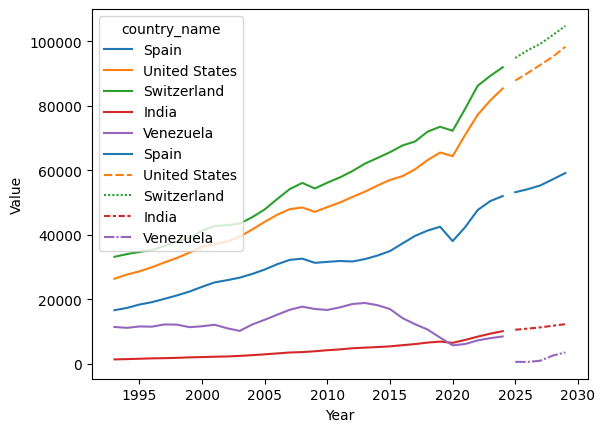

In [115]:
# Melt the DataFrame
df_melted = pd.melt(df_p.reset_index(), id_vars='country_name', var_name='Year', value_name='Value')

# Convert 'Year' to integer
df_melted['Year'] = df_melted['Year'].astype(int)

# Create a line plot for years before 2025
sns.lineplot(data=df_melted[df_melted['Year'] < 2025], x='Year', y='Value', hue='country_name')

# Create a dashed line plot for years from 2025 onwards
sns.lineplot(data=df_melted[df_melted['Year'] >= 2025], x='Year', y='Value', hue='country_name', style='country_name', dashes=True)

plt.show()

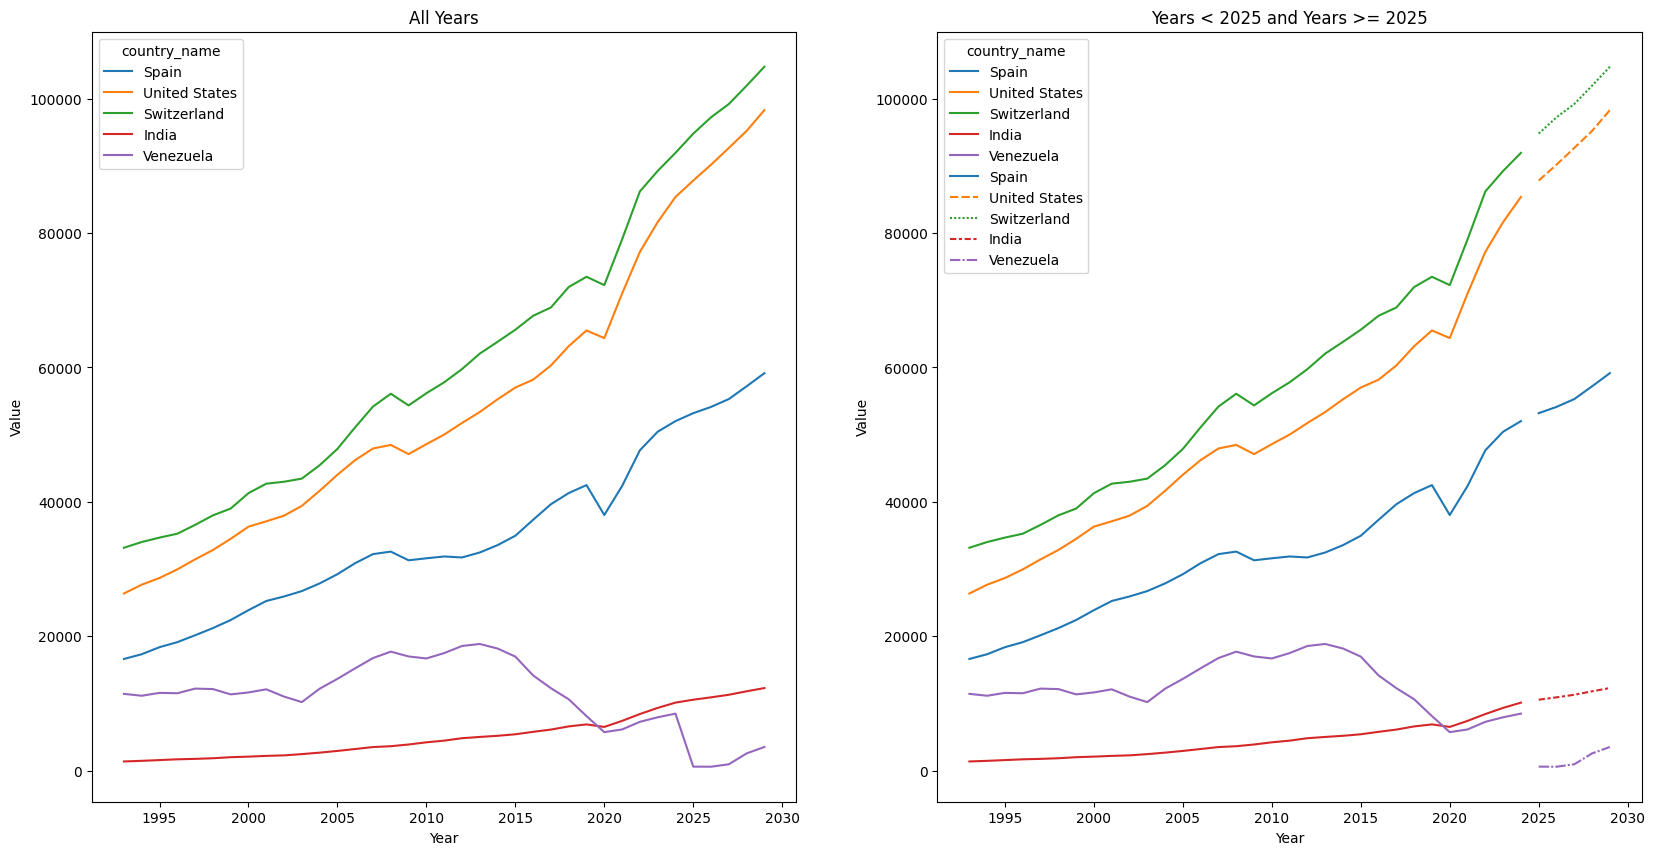

In [116]:
import matplotlib.pyplot as plt

# Melt the DataFrame
df_melted = pd.melt(df_p.reset_index(), id_vars='country_name', var_name='Year', value_name='Value')

# Convert 'Year' to integer
df_melted['Year'] = df_melted['Year'].astype(int)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Create a line plot for all years in the first subplot
sns.lineplot(data=df_melted, x='Year', y='Value', hue='country_name', ax=axs[0])
axs[0].set_title('All Years')

# Create a line plot for years before 2025 and a dashed line plot for years from 2025 onwards in the second subplot
sns.lineplot(data=df_melted[df_melted['Year'] < 2025], x='Year', y='Value', hue='country_name', ax=axs[1])
sns.lineplot(data=df_melted[df_melted['Year'] >= 2025], x='Year', y='Value', hue='country_name', style='country_name', dashes=True, ax=axs[1])
axs[1].set_title('Years < 2025 and Years >= 2025')

plt.show()